<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: German Urrea
- Nombre de alumno 2: Antonia Villegas


### **Link de repositorio de GitHub:** `https://github.com/G-Urrea/labs_mds-german-antonia.git`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 87.4 MB/s eta 0:00:00
  Attempting uninstall:

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [4]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


En un principio tenemos 525.461 observaciones.   
El dataset presenta las siguientes caracteristicas:
-  **Invoice**: Caracteristica categorica. Identifica una compra.
- **StockCode**: Caracteristica categorica. Identifica a un producto de forma única.
- **Description**: Caracteristica textual. Describe el producto.
- **InvoiceDate**: Caracteristica en formato de fecha. Corresponde a la fecha de facturación/compra.
- **Quantity**: Caracteristica númerica. Corresponde a la cantidad comprada
- **Price**: Caracteristica númerica. Corresponde al precio unitario de un producto.
- **Customer ID**: Caracteristica categorica. Sirve como identificador para el comprador.
- **Country**: Caracteristica textual. Representa el país en el que se realiza la orden/compra.

Dadas las caracteristicas, se puede concluir que cada fila representa la venta de un producto a un cliente, incluyendo atributos que permiten identificar la compra como única. Adicionalmente, de acuerdo a las descripciones de los productos, se puede inferir que la tienda vende productos de decoración para el hogar.

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariable consiste en analizar el comportamiento de una variable de interés en los datos mediante técnicas de estadistica y gráficas. Por otro lado, el análisis multivariable se enfoca en 2 o más variables con el objetivo de analizar las relaciones entre estas. Por último, el estudio de datos faltantes se basa en encontrar aquellos datos con valores nulos, generalmente con el objetivo de eliminarlos o asignarles un valor por defecto. En general, este tipo de ánalisis es útil para asegurar el trabajo con datos limpios e identificar patrones y relaciones en las variables de interés. 

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [5]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [6]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

De las métricas de la variable Invoice se desprende que hay un registro de alrededor de 28 mil compras únicas. Del gráfico de frecuencias se desprende que hay compras en donde se ha comprado una gran cantidad de productos distintos.

In [7]:
profile_serie(df_retail['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

De las métricas para StockCode se desprende que hay alrededor que 4632 productos únicos. Del gráfico de frecuencias resalta el código de los productos más populares, también es interesante notar algunos códigos como POST, M y DOT, los cuales probablemente no correspondan a productos sino a otro tipo de transacciones registradas.

In [8]:
profile_serie(df_retail['Description']) 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

Hay 4682 descripciones únicas para los productos, lo que resalta tomando en cuenta que no es el mismo número que para los StockCode, aunque podría deberse a cambios en las descripciones de estos. Algo muy importante a recalcar es la presencia de nan indistinguibles inicialmente en las métricas, esto se puede identificar en el hecho de que la segunda descripción más frecuente sea "nan".

In [9]:
profile_serie(df_retail['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

Es de interés notar que la mayor frecuencia de ventas se concentra en el último tramo de 2010, entre los meses de octubre y noviembre. Mientras que la menor frecuencia se concentra entre finales de 2009 e inicios de 2010

In [14]:
profile_serie(df_retail['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Existen cantidades negativas de productos vendidos, lo que en este caso se puede interpretar como un error. También existen algunos valores extremos, en particular hay cantidades del orden de los 19 mil, lo cuál podría interpretarse como un error. Por otro lado el skew es positivo, lo que indica que los datos tienen cierta asimetria hacia el lado izquierdo, en este caso hay más valores concentrados en cantidades pequeñas de producto (en particular, entre 0 y 3), cómo se puede verificar en los histogramas.

In [15]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object


Existen precios negativos y en cero, lo cuál en el contexto de ventas no tiene sentido. También existen algunos precios inusualmente altos, lo que probablemente sea incorrecto. La distribución de los precios se concentra en los precios de valores más bajos, como indican el valor skew y el histograma. Por otro lado, el valor alto de kurtosis junto a los histogramas indican que una gran cantidad de precios tienden a concentrarse cerca en un cierto rango (en este caso, entre 0.5 y 1.49). Es de recalcar que los outliers son extremos en este caso, como se puede apreciar en la diferencia de definición entre el primer y segundo histograma.

In [38]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

Hay 4383 clientes registrados, de los cuales el top 3 han realizado una cantidad de transacciones radicalmente superior al resto (más de 4000). Del ánalisis de metricas también resalta la existencia de valores nulos para los clientes, lo que podría ser un error, o compras por parte de clientes no registrados.

In [16]:
profile_serie(df_retail['Country']) 

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Hay 40 valores únicos para el país de venta. Sin embargo la mayoría de ventas se producen en el Reino Unido.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [17]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

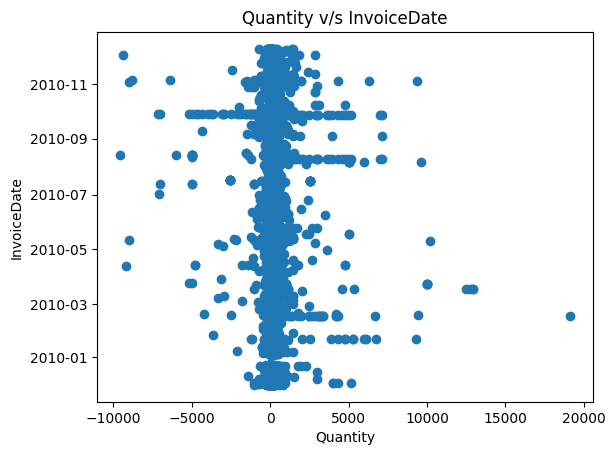

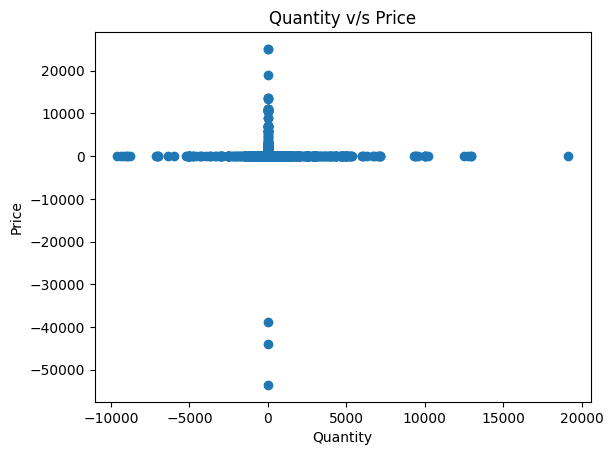

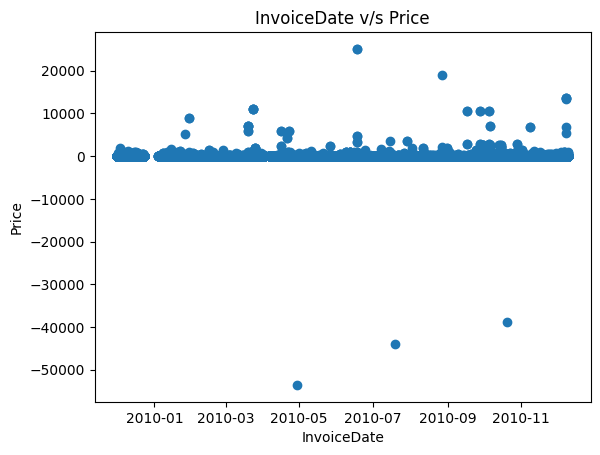

## Correlation:

## Missing Matrix:

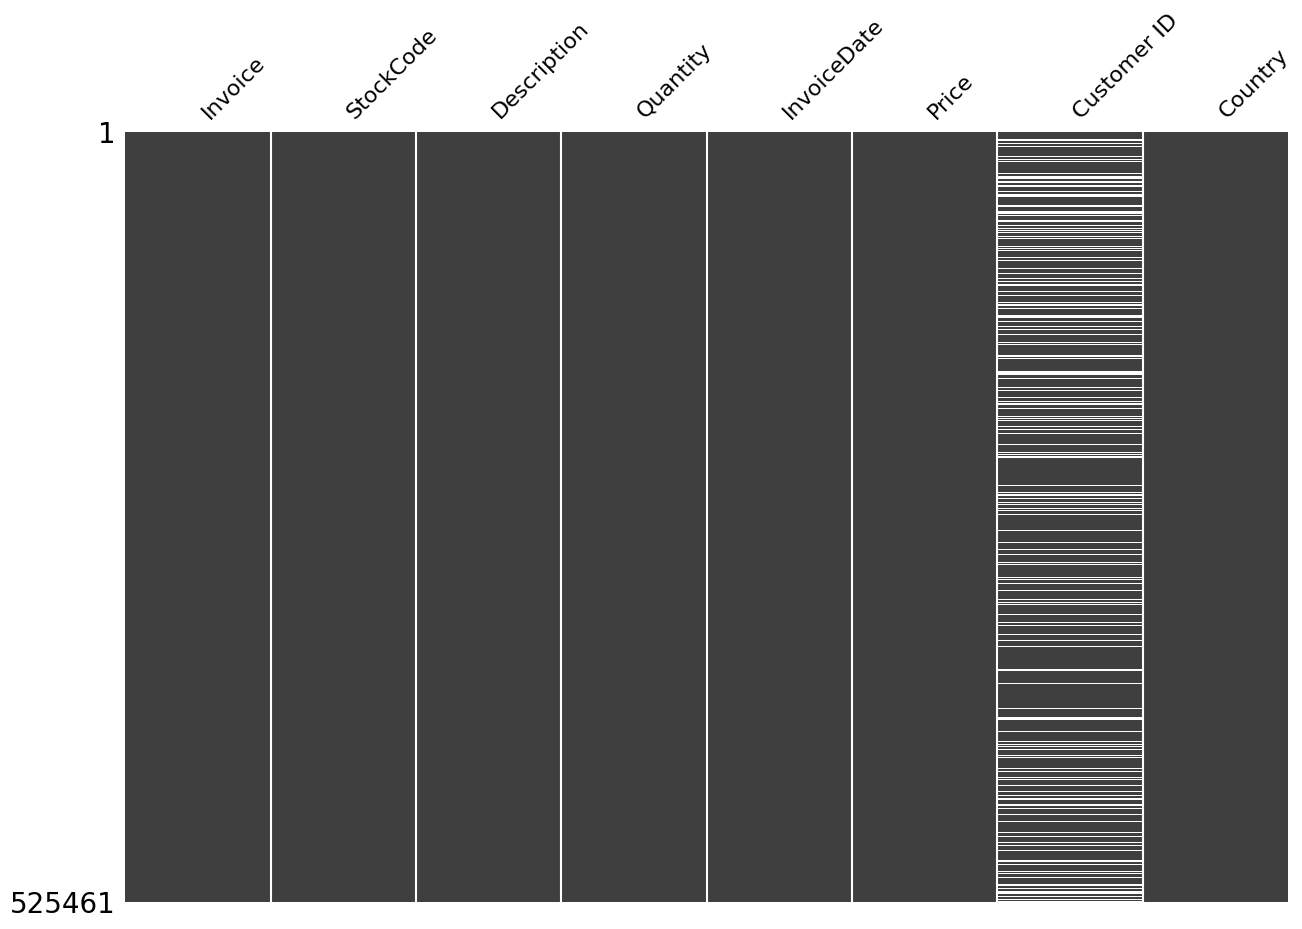

In [18]:
profile_df(df_retail)

De los gráficos de dispersión resalta la presencia de outliers y valores negativos en las variables quantity y price. En particular, del gráfico cantidad vs precio resalta la forma perpendicular del gráfico, la cuál sugiere que aquellos productos más baratos se compran en mayores cantidades, mientras que los más caros se compran en menores cantidades.

De la matriz de correlación no se pueden inferir relaciones claras entre las variables, esto debido a la baja correlación entre estas. Con respecto a la missing matrix se puede ver que hay valores faltantes en la variable de customer ID. 

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

Calculamos las ventas como la multuplicación en cada fila de la candidad comprada por el precio unitario en un nueva columna

In [19]:
df_retail['ventas'] = df_retail['Quantity'] * df_retail['Price']
df_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,ventas
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


El procedimiento estandar sería eliminar cualquier fila con un valor nulo, valores que se han encontrado en las columnas `Description` y `Customer ID`. Se puede asociar una venta en donde `Description` sea "nan" a una transacción de prueba o error en la venta, y si bien `Customer ID` nulo podría indicar un cliente no registrado, en este caso se elegirá eliminar cualquier fila en donde dicho valor sea nulo, para intentar asegurar el trabajo con datos de transacciones válidas.

In [20]:
def limpiar_ventas(df):
    df_cleaned = df.copy()

    # Eliminar filas con valores faltantes en 'Customer ID'
    df_cleaned = df_cleaned.dropna(subset=['Customer ID'])

    # Eliminar filas donde 'Description' es 'nan'
    df_cleaned = df_cleaned[df_cleaned['Description'] != 'nan']

    # Eliminar valores negativos en 'Quantity' y 'Price'
    df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['Price'] > 0)]

    # Verificar filas donde se cumple z-score < 3 para 'Quantity' y 'Price'
    valid_quantities = (np.abs(stats.zscore(df_cleaned['Quantity'])) < 3)
    valid_prices = (np.abs(stats.zscore(df_cleaned['Price'])) < 3)
    df_cleaned = df_cleaned[(valid_prices) & (valid_quantities)]

    # Restringir los valores de 'Quantity' a ser menores que 100
    df_cleaned = df_cleaned[df_cleaned['Quantity'] < 100]

    # Restringir los valores de 'Price' a ser menores que 50
    df_cleaned = df_cleaned[df_cleaned['Price'] < 50]

    # Restablecer índices después de eliminar filas
    df_cleaned.reset_index(drop=True, inplace=True)

    return df_cleaned

Es importante aclarar que se está en presencia de un minorista por lo que las compras no son en grandes cantidades y los precios son en libras dado que prácticamente el consumidor principal es Reino Unido. Dejamos como cota superior 50 productos por compra y un precio máximo de 100 libras de un producto para eliminar outliers. 

In [21]:
limpio = limpiar_ventas(df_retail)
limpio

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,ventas
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
400548,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
400549,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
400550,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
400551,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


Vemos que después de una limpieza la cantidad de observaciones diminuye a 400.553

In [22]:
profile_serie(limpio['Price']) 

## Price Profile

Type                            float64
Number of observations         400553.0
Mean                           3.004598
Std                            3.133643
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                               49.95
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          27.497869
Skew                           3.683245
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400484
Duplicate rows (%)              99.98 %
Total size in memory      3204552 bytes
dtype: object

In [23]:
profile_serie(limpio['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         400553.0
Mean                           8.900151
Std                           12.127066
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                                98.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          16.171408
Skew                           3.451679
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400546
Duplicate rows (%)              100.0 %
Total size in memory      3204552 bytes
dtype: object

In [24]:
profile_serie(limpio['ventas']) 

## ventas Profile

Type                            float64
Number of observations         400553.0
Mean                          17.106009
Std                           28.240487
Min                               0.001
25%                                4.95
50%                                11.7
75%                               17.85
Max                             2970.75
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                         918.781166
Skew                          15.982309
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400067
Duplicate rows (%)              99.88 %
Total size in memory      3204552 bytes
dtype: object

En los análisis individuales de las variables de precio, cantidad y ventas podemos ver de forma numérica que hay menos outliers

## Bivariant Analysis:

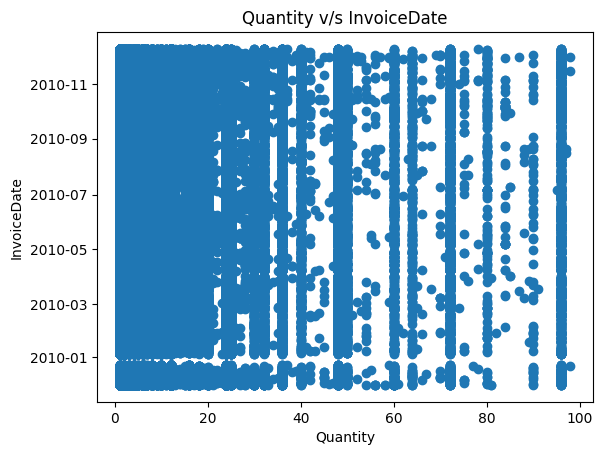

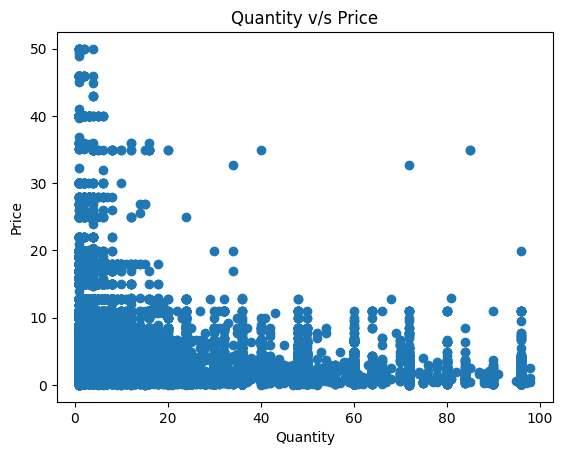

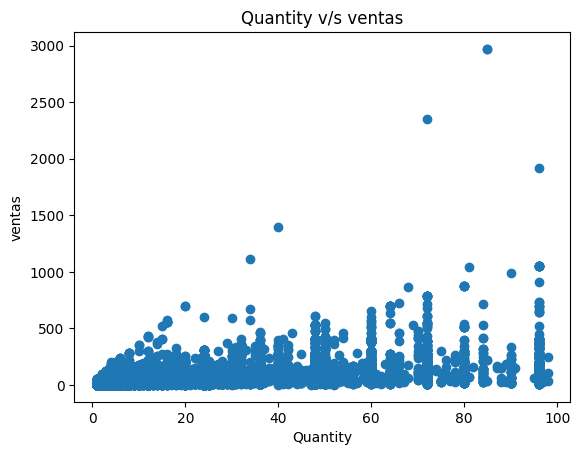

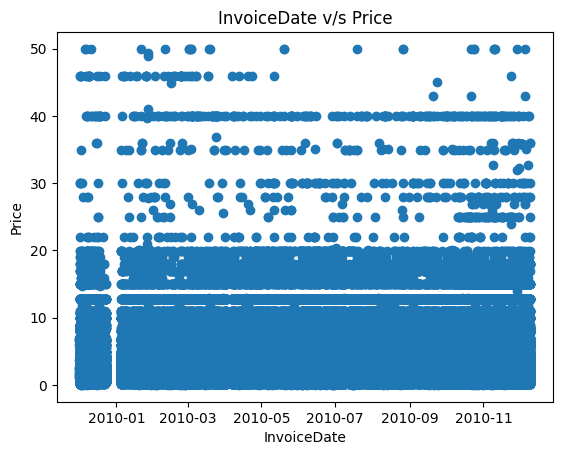

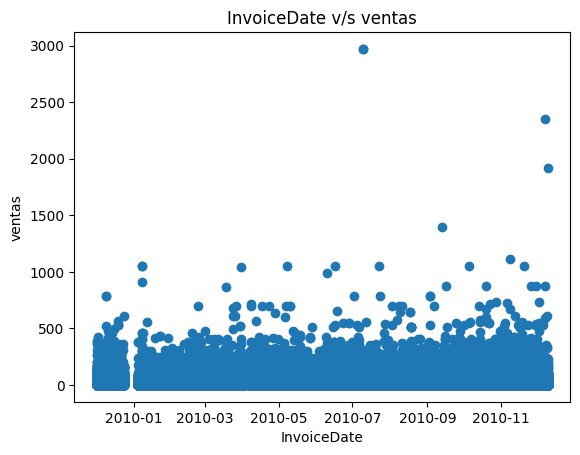

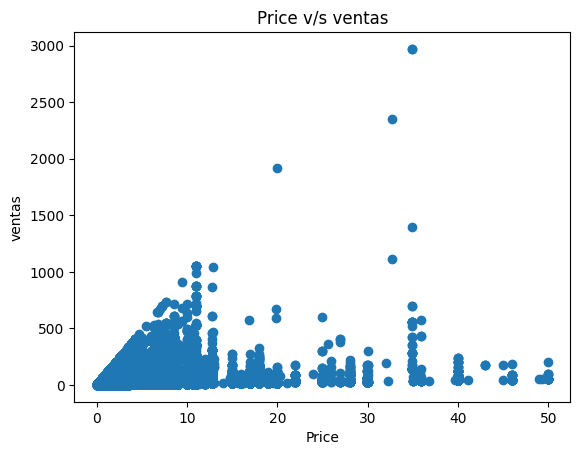

## Correlation:

## Missing Matrix:

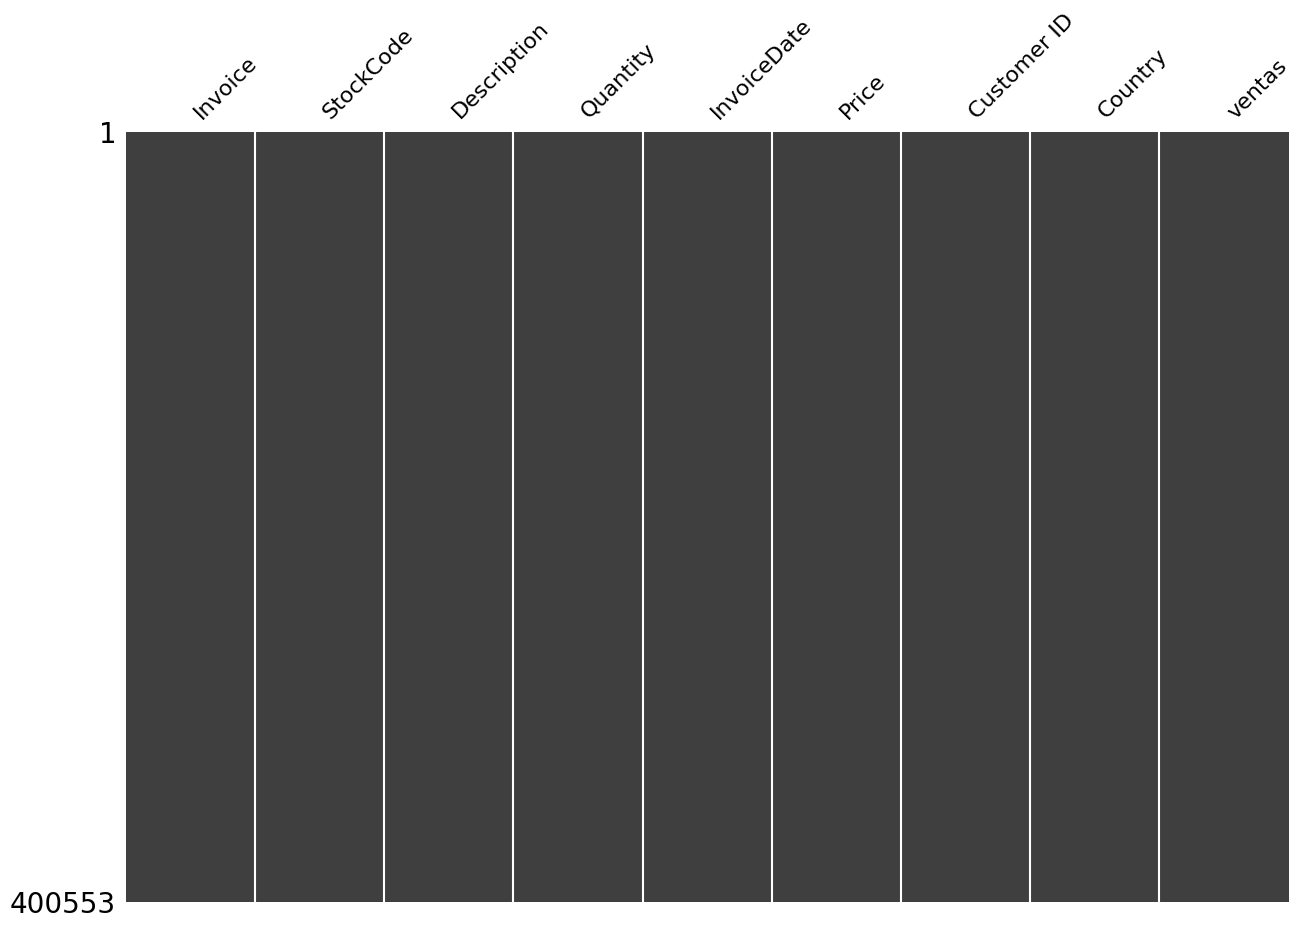

In [25]:
profile_df(limpio)

Debido a la eliminación de outliers y valores negativos ahora las visualizaciones son más claras. Sin embargo, la única relación clara entre las variables se da entre la cantidad y el precio unitario, en donde se evidencia que hay una mayor cantidad de unidades vendidas entre menor sea el precio unitario. La missing matrix ya no presenta valores faltantes. 

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

Agrupamos los datos por el nombre del producto y sumarmos las ganancias para cada producto:

In [26]:
top_ganancias = limpio.groupby('Description')['ventas'].sum().nlargest(30)
top_ganancias

Description
REGENCY CAKESTAND 3 TIER              122694.15
WHITE HANGING HEART T-LIGHT HOLDER    111049.09
POSTAGE                                43333.60
ASSORTED COLOUR BIRD ORNAMENT          36461.86
PARTY BUNTING                          31473.40
HOME BUILDING BLOCK WORD               28206.80
VINTAGE UNION JACK BUNTING             27999.00
PAPER CHAIN KIT 50'S CHRISTMAS         25542.80
STRAWBERRY CERAMIC TRINKET BOX         24832.02
RED HANGING HEART T-LIGHT HOLDER       24755.40
SCOTTIE DOG HOT WATER BOTTLE           23753.70
DOOR MAT UNION FLAG                    23453.68
CHOCOLATE HOT WATER BOTTLE             23319.60
SET/4 WHITE RETRO STORAGE CUBES        23252.50
RED RETROSPOT CAKE STAND               23072.90
WOODEN FRAME ANTIQUE WHITE             22939.75
EDWARDIAN PARASOL NATURAL              22764.15
TEA TIME CAKE STAND IN GIFT BOX        22037.40
SET/5 RED SPOTTY LID GLASS BOWLS       21107.80
HOT WATER BOTTLE TEA AND SYMPATHY      20854.05
LOVE BUILDING BLOCK WORD    

Crear un gráfico de barras utilizando Plotly para visualizar los ingresos/cantidades de venta en función del nombre de los productos

In [27]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=top_ganancias.index, y=top_ganancias.values)])

fig.update_layout(
    title="Top 30 Productos con Mayores Ganancias",
    xaxis_title="Productos",
    yaxis_title="Ganancias",
    xaxis_tickangle=-45,
)

fig.show()

No necesariamente los productos más vendidos son los que generan mayores ganancias y vamos a averiguarlo. Agrupamos los datos por el nombre del producto, sumamos las cantidades vendidas para cada producto y seleccionamos los 30 productos más vendidos. 

In [28]:
top_ventas = limpio.groupby('Description')['Quantity'].sum().nlargest(30)
top_ventas

Description
WHITE HANGING HEART T-LIGHT HOLDER     40957
ASSORTED COLOUR BIRD ORNAMENT          21658
PACK OF 72 RETRO SPOT CAKE CASES       21588
WORLD WAR 2 GLIDERS ASSTD DESIGNS      21298
STRAWBERRY CERAMIC TRINKET BOX         20898
60 TEATIME FAIRY CAKE CASES            18862
PACK OF 60 PINK PAISLEY CAKE CASES     15286
ASSTD DESIGN BUBBLE GUM RING           14820
ANTIQUE SILVER TEA GLASS ETCHED        12984
HANGING JAM JAR T-LIGHT HOLDER         12727
SET/20 RED SPOTTY PAPER NAPKINS        11815
VICTORIAN GLASS HANGING T-LIGHT        11748
SWEETHEART CERAMIC TRINKET BOX         11722
MINI PAINT SET VINTAGE                 11399
COLOUR GLASS T-LIGHT HOLDER HANGING    10640
HANGING HEART ZINC T-LIGHT HOLDER      10565
REGENCY CAKESTAND 3 TIER               10561
GRAND CHOCOLATECANDLE                  10398
PACK OF 72 SKULL CAKE CASES            10362
LUNCH BAG RED SPOTTY                   10264
VINTAGE SNAP CARDS                     10225
JUMBO BAG RED RETROSPOT                1005

In [29]:
common_products = top_ventas.index.intersection(top_ganancias.index)
common_products

Index(['WHITE HANGING HEART T-LIGHT HOLDER', 'ASSORTED COLOUR BIRD ORNAMENT',
       'STRAWBERRY CERAMIC TRINKET BOX', 'REGENCY CAKESTAND 3 TIER',
       'JUMBO BAG RED RETROSPOT', 'PAPER CHAIN KIT 50'S CHRISTMAS ',
       'RED HANGING HEART T-LIGHT HOLDER'],
      dtype='object', name='Description')

Sólo 7 de los producctos más vendidos están en el grupo de los 30 producctos que generan más ganancias: 

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

Primero separamos el formato de la fecha y hora de compra que está en una sola columna en diferentes columnas, una para el año, otra para el mes, otra para el día y otra para la fecha. 

In [30]:
def separate_datetime_columns(dataframe, datetime_column):
    # Convertir la columna de fecha y hora al tipo de dato datetime
    dataframe[datetime_column] = pd.to_datetime(dataframe[datetime_column])

    # Extraer el año, mes, día y hora en columnas separadas
    dataframe['Year'] = dataframe[datetime_column].dt.year
    dataframe['Month'] = dataframe[datetime_column].dt.month
    dataframe['Day'] = dataframe[datetime_column].dt.day
    dataframe['Hour'] = dataframe[datetime_column].dt.hour

    # Eliminar la columna original de fecha y hora
    dataframe = dataframe.drop(columns=[datetime_column])

    return dataframe

In [31]:
separate_datetime_columns(limpio, "InvoiceDate")

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,ventas,Year,Month,Day,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40,2009,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,2009,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,2009,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80,2009,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00,2009,12,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
400548,538171,22271,FELTCRAFT DOLL ROSIE,2,2.95,17530.0,United Kingdom,5.90,2010,12,9,20
400549,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,17530.0,United Kingdom,3.75,2010,12,9,20
400550,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,17530.0,United Kingdom,3.75,2010,12,9,20
400551,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,17530.0,United Kingdom,7.50,2010,12,9,20


Hacemos la función de ventas por con el mayor nivel de agregación que es por hora, día, mes y año. 

In [32]:
import matplotlib.pyplot as plt

def plot_ventas(dataframe):
    # Convertir la columna de fecha al tipo de dato datetime
    dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])

    # Agrupar los datos por año, mes y día y calcular la suma de las ventas
    ventas_por_fecha = dataframe.groupby([dataframe['InvoiceDate'].dt.year, dataframe['InvoiceDate'].dt.month, dataframe['InvoiceDate'].dt.day])['ventas'].sum()

    # Crear un índice de fechas
    fechas = pd.to_datetime([f"{year}-{month}-{day}" for year, month, day in ventas_por_fecha.index])

    # Crear la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficar la variación de las ventas
    ax.plot(fechas, ventas_por_fecha.values)

    # Configurar etiquetas y título
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Ventas')
    ax.set_title('Variación de las ventas')

    # Rotar las etiquetas del eje x para una mejor visualización
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

Graficamos:

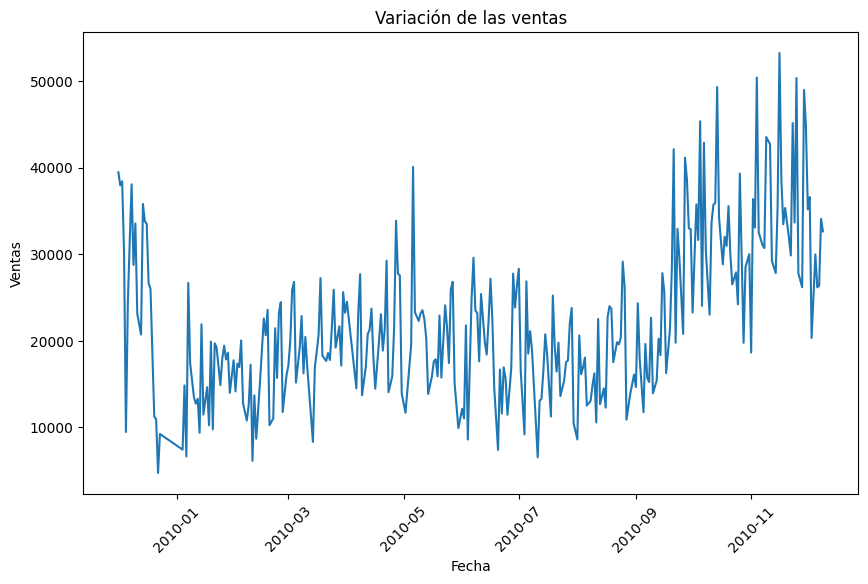

In [33]:
plot_ventas(limpio)

vemos que ocurre algo extraño a fines del 2009, lo cual es contraintuitivo porque son fechas de fiestas y donde el consumo es mayor. Veamos qué pasa a nivel de mes: 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_ventas_mes(dataframe):
    # Convertir la columna de fecha al tipo de dato datetime
    dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])

    # Extraer el mes de la columna de fecha
    dataframe['Mes'] = dataframe['InvoiceDate'].dt.month

    # Agrupar los datos por mes y calcular la suma de las ventas
    ventas_por_mes = dataframe.groupby('Mes')['ventas'].sum()

    # Crear la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficar las ventas por mes
    ax.plot(ventas_por_mes.index, ventas_por_mes.values)

    # Configurar etiquetas y título
    ax.set_xlabel('Mes')
    ax.set_ylabel('Ventas')
    ax.set_title('Ventas por Mes')

    # Mostrar el gráfico
    plt.show()

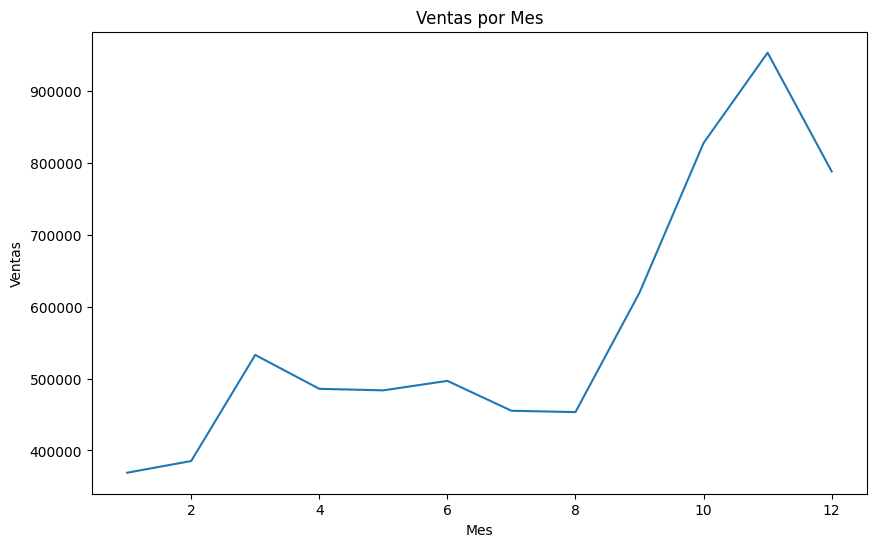

In [35]:
plot_ventas_mes(limpio)

Se puede notar que las aumentan a medida que se acerca fin de año, lo cual comprueba de que hay problemas con algunos datos. Vamos a crear una función que detecta outliers para comprobar nuestra teoría: 

In [36]:
def detectar_outliers(dataframe, columna):
    # Calcular la media y desviación estándar de la columna
    media = np.mean(dataframe[columna])
    desviacion_estandar = np.std(dataframe[columna])

    # Definir el umbral para identificar outliers
    umbral = 3

    # Encontrar los outliers
    outliers = dataframe[(dataframe[columna] > media + umbral * desviacion_estandar) |
                         (dataframe[columna] < media - umbral * desviacion_estandar)]

    return outliers

In [37]:
detectar_outliers(limpio, "ventas")

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,ventas,Year,Month,Day,Hour,Mes
30,489436,22111,SCOTTIE DOG HOT WATER BOTTLE,24,2009-12-01 09:06:00,4.25,13078.0,United Kingdom,102.00,2009,12,1,9,12
61,489438,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.0,United Kingdom,168.00,2009,12,1,9,12
62,489438,84031B,CHARLIE LOLA BLUE HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.0,United Kingdom,168.00,2009,12,1,9,12
63,489438,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,60,2009-12-01 09:24:00,1.90,18102.0,United Kingdom,114.00,2009,12,1,9,12
64,489438,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,1.90,18102.0,United Kingdom,106.40,2009,12,1,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399657,538063,22830,UTILTY CABINET WITH HOOKS,96,2010-12-09 13:44:00,19.94,18102.0,United Kingdom,1914.24,2010,12,9,13,12
400078,538101,35001W,HAND OPEN SHAPE DECO.WHITE,78,2010-12-09 15:01:00,2.95,15380.0,United Kingdom,230.10,2010,12,9,15,12
400241,538151,22622,BOX OF VINTAGE ALPHABET BLOCKS,24,2010-12-09 16:28:00,8.50,16163.0,United Kingdom,204.00,2010,12,9,16,12
400245,538151,47566,PARTY BUNTING,50,2010-12-09 16:28:00,3.75,16163.0,United Kingdom,187.50,2010,12,9,16,12


Se comprueba que hay 6307 observaciones que están provocando problemas al graficar las ventas. 

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>